In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount(r"/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
# cd '/content/drive/MyDrive/nasa_hackathon'


In [2]:
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [15]:
# data = pd.read_csv('/content/drive/MyDrive/nasa_hackathon/temperature_system_failure.csv')

# xa.s12.00.mhz.1970-06-15HR00_evid00008.csv
# data = pd.read_csv('/content/drive/MyDrive/nasa_hackathon /ambient_temperature_system_failure.csv')

data = pd.read_csv(r'/content/drive/MyDrive/nasa_hackathon /xa.s12.00.mhz.1970-06-15HR00_evid00008.csv')
display()
# Exclude datetime column
# data_values = data.drop('timestamp',axis=1).values
data_values = data.drop(data.columns[[0, 1]], axis=1).values


# Convert data to float type
data_values = data_values.astype('float32')
print(data_values)

# Create new dataframe with converted values
data_converted = pd.DataFrame(data_values, columns=['velocity'])

# Add back datetime column
# data_converted.insert(0, 'timestamp', data['timestamp'])

data_converted.insert(0, 'timestamp', data['time_rel(sec)'])



[[-8.0425762e-16]
 [-9.6665645e-16]
 [-1.0466555e-15]
 ...
 [-1.6898710e-16]
 [-2.2552964e-16]
 [-3.2253170e-16]]


In [36]:
# i looked at this from the csv for this signal
rel_impact_time = '68400.0'


In [16]:
display(data)

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-06-15T00:00:00.510000,0.000000,-8.042576e-16
1,1970-06-15T00:00:00.660943,0.150943,-9.666565e-16
2,1970-06-15T00:00:00.811887,0.301887,-1.046656e-15
3,1970-06-15T00:00:00.962830,0.452830,-9.966189e-16
4,1970-06-15T00:00:01.113774,0.603774,-8.303573e-16
...,...,...,...
572413,1970-06-16T00:00:02.472264,86401.962264,4.117540e-17
572414,1970-06-16T00:00:02.623208,86402.113208,-1.010661e-16
572415,1970-06-16T00:00:02.774151,86402.264151,-1.689871e-16
572416,1970-06-16T00:00:02.925094,86402.415094,-2.255296e-16


In [17]:
display(data_converted)

,timestamp,velocity
0,0.000000,-8.042576e-16
1,0.150943,-9.666564e-16
2,0.301887,-1.046656e-15
3,0.452830,-9.966189e-16
4,0.603774,-8.303574e-16
...,...,...
572413,86401.962264,4.117540e-17
572414,86402.113208,-1.010661e-16
572415,86402.264151,-1.689871e-16
572416,86402.415094,-2.255296e-16


In [18]:
data_converted = data_converted.dropna()

In [19]:
display(data_converted)

,timestamp,velocity
0,0.000000,-8.042576e-16
1,0.150943,-9.666564e-16
2,0.301887,-1.046656e-15
3,0.452830,-9.966189e-16
4,0.603774,-8.303574e-16
...,...,...
572413,86401.962264,4.117540e-17
572414,86402.113208,-1.010661e-16
572415,86402.264151,-1.689871e-16
572416,86402.415094,-2.255296e-16


In [20]:
# Exclude datetime column again
data_tensor = tf.convert_to_tensor(data_converted.drop('timestamp', axis=1).values, dtype=tf.float32)

# Define the autoencoder model
input_dim = data_converted.shape[1] - 1
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile and fit the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_tensor, data_tensor, epochs=5, batch_size=32, shuffle=True)



Epoch 1/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 3.0891e-19
Epoch 2/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 3.1663e-19
Epoch 3/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 3.0664e-19
Epoch 4/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 3.0770e-19
Epoch 5/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 3.1376e-19
Epoch 6/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 3.1264e-19
Epoch 7/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 3.0827e-19
Epoch 8/50
17889/17889 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 3.1122e-19
Epoch 9/50


KeyboardInterrupt: 

In [22]:
# Calculate the reconstruction error for each data point
reconstructions = autoencoder.predict(data_tensor)
mse = tf.reduce_mean(tf.square(data_tensor - reconstructions),axis=1)
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')
anomaly_scores.index = data_converted.index

17889/17889 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step


In [23]:
threshold = anomaly_scores.quantile(0.99)
anomalous = anomaly_scores > threshold
binary_labels = anomalous.astype(int)
precision, recall, f1_score, _ = precision_recall_fscore_support(binary_labels, anomalous, average='binary')


In [31]:
print(anomalous==True)
true_indexes = [i for i, x in enumerate(anomalous) if x]
print("Indexes of True values:", true_indexes)

0         False
1         False
2         False
3         False
4         False
          ...  
572413    False
572414    False
572415    False
572416    False
572417    False
Name: anomaly_scores, Length: 572418, dtype: bool
Indexes of True values: [453613, 453617, 453621, 453713, 453714, 453717, 453718, 453721, 453724, 453728, 453731, 453732, 453738, 453739, 453741, 453742, 453745, 453746, 453748, 453749, 453751, 453752, 453753, 453757, 453762, 453763, 453764, 453766, 453767, 453770, 453771, 453774, 453780, 453781, 453784, 453836, 453837, 453840, 453841, 453844, 453847, 453848, 453849, 453851, 453852, 453855, 453856, 453859, 453906, 453909, 453910, 453911, 453913, 453914, 453917, 453918, 453921, 453922, 453925, 453926, 453929, 453930, 453933, 453958, 453959, 453961, 453962, 453963, 453965, 453966, 453967, 453969, 453970, 453971, 453973, 453974, 453976, 453977, 453978, 453980, 453981, 453982, 453984, 453985, 453988, 453989, 453992, 453993, 453996, 454025, 454029, 454032, 454033, 45403

In [34]:
avg = sum(true_indexes) / len(true_indexes)
print(avg)

459495.6836681223


In [32]:
print(data_tensor)

tf.Tensor(
[[-8.0425762e-16]
 [-9.6665645e-16]
 [-1.0466555e-15]
 ...
 [-1.6898710e-16]
 [-2.2552964e-16]
 [-3.2253170e-16]], shape=(572418, 1), dtype=float32)


In [38]:
# Iterating over the DataFrame using the specified indices
anamolic_time_stamps = []
for index in true_indexes:
    row = data_converted.loc[index]
    anamolic_time_stamps.append(row['timestamp'])
    # print(f"Index: {index}, Row: {row.to_dict()}")

# the average of the timestamps will be the predicted answer.
# model predicts the index of those timestaps then we fetch the only predicted timestamps from the csv and take average.
avg = sum(anamolic_time_stamps) / len(anamolic_time_stamps)
print('predicted impact time -> ' , rel_impact_time)

rel_impact_time = '68400.0'
print('real impact time -> ' , rel_impact_time)

69357.83904424452


In [33]:
import tensorflow as tf

# Example 1D TensorFlow tensor and corresponding boolean mask list
# data_tensor = tf.constant([0.5, 1.2, -0.8, 3.4, 5.6, -1.2, 2.3], dtype=tf.float32)
# anomalous = [False, True, False, True, False, False, True]  # Boolean mask with True and False

# Convert the boolean list to a TensorFlow tensor
anomalous_tensor = tf.constant(anomalous)

# 1. Get the values from `data_tensor` that correspond to `True` in `anomalous`
true_values = tf.boolean_mask(data_tensor, anomalous_tensor)
print("Values corresponding to True indices in data_tensor:", true_values.numpy())

# 2. Get the indexes of the `True` values in the `anomalous` list
true_indexes = tf.where(anomalous_tensor).numpy().flatten()
print("Indexes of True values:", true_indexes)

# Optional: Print the values along with their corresponding indexes
for index in true_indexes:
    print(f"Index: {index}, Value: {data_tensor[index].numpy()}")


Streaming output truncated to the last 5000 lines.
Index: 455420, Value: [-5.2620255e-09]
Index: 455421, Value: [-6.6064163e-09]
Index: 455422, Value: [-4.579313e-09]
Index: 455424, Value: [2.9307898e-09]
Index: 455425, Value: [4.3264348e-09]
Index: 455426, Value: [3.1715226e-09]
Index: 455429, Value: [-3.4113514e-09]
Index: 455430, Value: [-2.7081217e-09]
Index: 455433, Value: [4.221278e-09]
Index: 455434, Value: [4.7274025e-09]
Index: 455435, Value: [3.3974874e-09]
Index: 455437, Value: [-2.7786924e-09]
Index: 455438, Value: [-5.430726e-09]
Index: 455439, Value: [-6.257242e-09]
Index: 455440, Value: [-4.758487e-09]
Index: 455442, Value: [2.7475187e-09]
Index: 455443, Value: [5.9163074e-09]
Index: 455444, Value: [6.87868e-09]
Index: 455445, Value: [5.2335234e-09]
Index: 455447, Value: [-2.4394193e-09]
Index: 455448, Value: [-5.4267555e-09]
Index: 455449, Value: [-6.225031e-09]
Index: 455450, Value: [-4.6639324e-09]
Index: 455453, Value: [4.188497e-09]
Index: 455454, Value: [4.4697024e

In [25]:
# test = data_converted['value'].values
test = data_converted['velocity'].values

predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


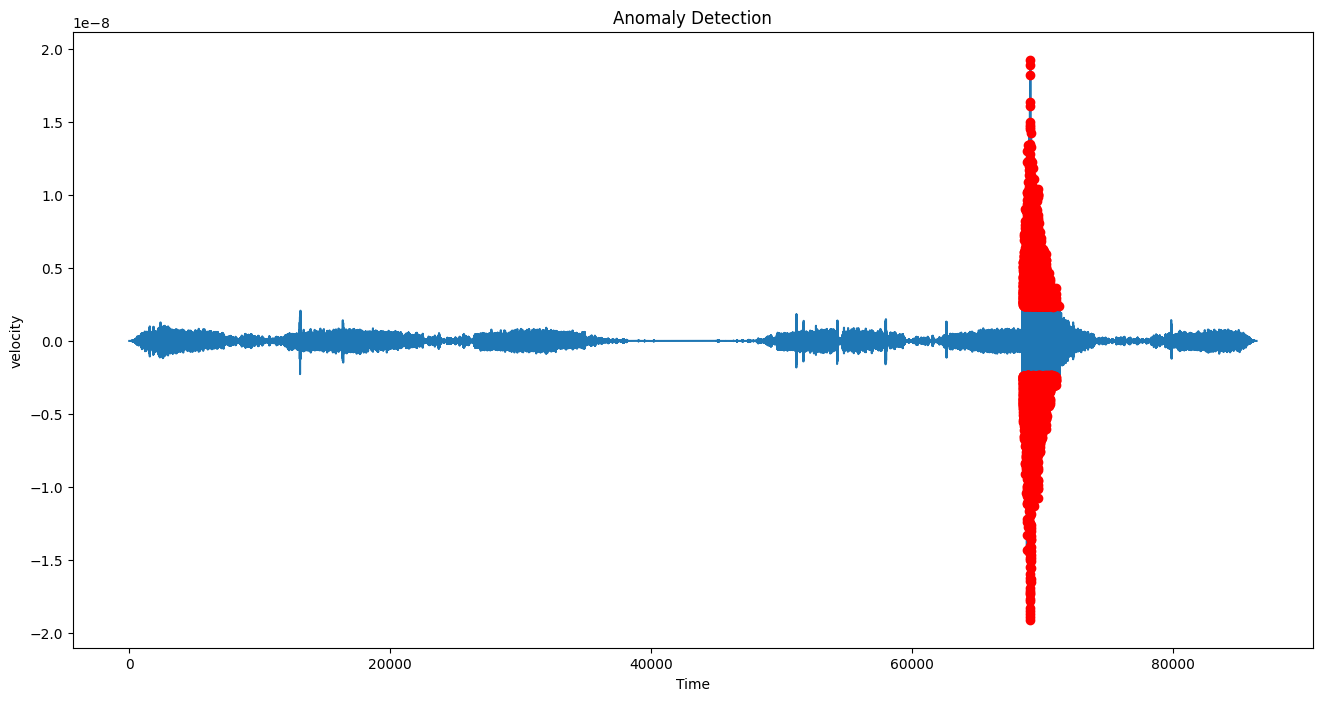

In [27]:
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
# plt.plot(data_converted['timestamp'], data_converted['value'])
plt.plot(data_converted['timestamp'], data_converted['velocity'])

# plt.plot(data_converted['timestamp'][anomalous],data_converted['value'][anomalous], 'ro')
plt.plot(data_converted['timestamp'][anomalous],data_converted['velocity'][anomalous], 'ro')

plt.title('Anomaly Detection')
plt.xlabel('Time')
# plt.ylabel('Value')
plt.ylabel('velocity')

plt.show()